In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
import sklearn
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate

In [34]:
d=[]
for year in range(7,18):
    if year//10==0:
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(0)+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
    else :
        data=pd.read_sas('c:/users/nb-0242/desktop/PHR/질병관리본부/HN'+str(year)+'_ALL.sas7bdat', encoding='latin-1')
        d.append(data)
len(d)

11

# rf ver (var remove)

In [48]:
var = pd.read_csv('var.csv',header=None)
var = list(var[0].values)
len(var)

101

In [49]:
for kill in ['EC_wht_23', 'HE_DMfh3' ,'HE_HLdg' ,'HE_Bplt', 'N_MUFA' ,'N_N3' ,'N_SFA' ,'N_N6', 'N_PUFA', 'D_8_2', 'GS_mea_r_3', 'GS_mea_l_3', 'GS_mea_r_1', 'GS_mea_r_2', 'D_8_1', 'D_8_3']:
    
    var.remove(kill)

In [50]:
for kill in ['N_ASH' ,'N_FIBER', 'BS2_1', 'LQ_VAS' ,'DI1_lt']:
    var.remove(kill)

In [51]:
for kill in ['O_DMFTP', 'BP8' ,'OR1']:
    var.remove(kill)

In [52]:
var.remove('HE_HDL_st2')

In [53]:
var.remove('HE_HbA1c')

In [54]:
var.remove('BE3_33')

In [55]:
data_.loc[data_['DE1_dg']==0.0, ['DE1_dg']] =8.0
data_ = data_.loc[data_['DE1_dg']!=9.0, :]
data_['DE1_dg'].value_counts()

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


8.0    51863
1.0     4385
Name: DE1_dg, dtype: int64

# xgboost ver (var remove)

In [26]:
var = pd.read_csv('var_xgb.csv',header=None)
var = list(var[0].values)
len(var)

100

In [27]:
for kill in ['N_N6', 'HE_DMfh2', 'EC_wht_23', 'N_N3', 'HE_DMfh3', 'LK_LB_CO', 'N_PUFA', 'GS_mea_r_1', 'GS_mea_l_1',
 'GS_mea_r_3', 'GS_mea_l_3', 'GS_mea_r_2', 'D_8_1_s', 'BE8_1']:
    var.remove(kill)

In [28]:
for kill in ['BS2_1' ,'DI2_lt', 'N_ASH']:
    var.remove(kill)

In [29]:
var.remove('BE3_11')

In [30]:
for kill in ['BE5_2', 'BM12_1', 'BP8', 'O_DTP']:
    var.remove(kill)

In [31]:
var.append('DE1_dg')

In [32]:
len(var)

79

In [35]:
df=[]
for i in range(11):
    data = d[i][var].dropna()
    df.append(data)

In [36]:
data = pd.concat([df[0],df[1],df[2],df[3],df[4],df[5],df[6],df[7],df[8],df[9],df[10]], axis=0, ignore_index=True)

In [37]:
data['DE1_dg'].value_counts()

8.0    25988
0.0    25875
1.0     4385
9.0      542
Name: DE1_dg, dtype: int64

In [38]:
data.loc[data['DE1_dg']==0, ['DE1_dg']] =8.0
data_ = data.loc[data['DE1_dg']!=9.0, :]
data_['DE1_dg'].value_counts()

8.0    51863
1.0     4385
Name: DE1_dg, dtype: int64

In [32]:
# data_.to_csv('data_xgb.csv', index=False)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
import sklearn
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [46]:
data_ = pd.read_csv('c:/users/nb-0242/jupyter/PHR/data_.csv')

In [85]:
data.columns[~data.columns.isin(data_.columns)]

Index([], dtype='object')

In [2]:
data_ = pd.read_csv('c:/users/nb-0242/jupyter/PHR/data_25k.csv')

In [8]:
data_.loc[data_['DE1_dg']==0, ['DE1_dg']] =8.0
data_ = data_.loc[data_['DE1_dg']!=9.0, :]
data_['DE1_dg'].value_counts()

8.0    42802
1.0     3398
Name: DE1_dg, dtype: int64

# 모델링 가ㅡㅏ

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_, data_['DE1_dg'],test_size=0.2)
X_train = X_train.iloc[:, ~X_train.columns.isin(['DE1_dg'])]
X_test = X_test.iloc[:, ~X_test.columns.isin(['DE1_dg'])]
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)


c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
f1_score(y_test, rf_yhat)

0.2730299667036626

In [14]:
confusion_matrix(y_test, rf_yhat)

array([[ 116,  575],
       [ 141, 8408]], dtype=int64)

In [85]:
y_test.value_counts()

8.0    9738
1.0     799
Name: DE1_dg, dtype: int64

# 표준화 데이터셋 ver

In [15]:
x = pd.read_csv('data_25k_norm.csv')
y = pd.read_csv('data_25k_y.csv')

In [19]:
y['DE1_dg'].value_counts()

8.0    21853
0.0    20949
1.0     3398
9.0        1
Name: DE1_dg, dtype: int64

In [20]:
y.loc[y['DE1_dg']==0, ['DE1_dg']] =8.0
y= y.loc[y['DE1_dg']!=9.0, :]
y['DE1_dg'].value_counts()

8.0    42802
1.0     3398
Name: DE1_dg, dtype: int64

In [27]:
x =x.loc[x.index.isin(y.index),:]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
X_train = X_train.iloc[:, ~X_train.columns.isin(['DE1_dg'])]
X_test = X_test.iloc[:, ~X_test.columns.isin(['DE1_dg'])]
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)


c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [29]:
f1_score(y_test, rf_yhat)

0.2234392113910186

Text(0, 0.5, 'Feature Importance Score')

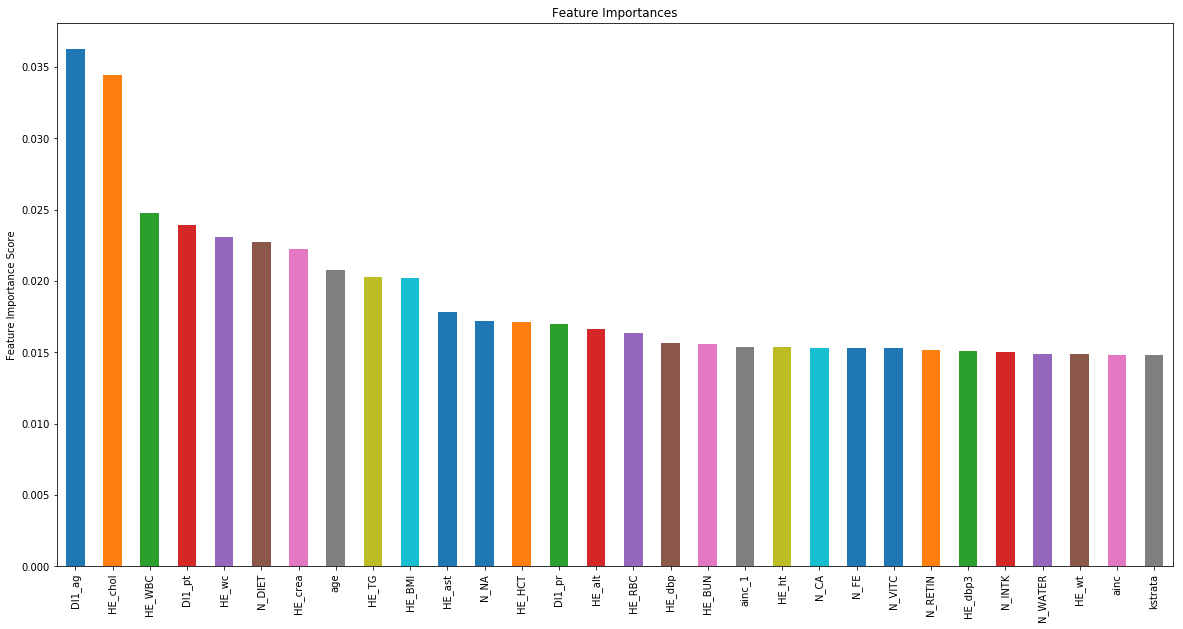

In [38]:
plt.figure(figsize=(20,10))
feat_importances.nlargest(30).plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

<h3> randomforest 최적화

In [131]:
n_est = range(5,11)
m_depth = range(30,len(X_train.columns)-1, 3)
f1_mat=[]
for n in n_est:
    f1_row=[]
    for m in m_depth:
        rf = RandomForestClassifier(n_jobs=-1,n_estimators=n, max_depth=m )
        rf.fit(X_train, y_train)
        rf_yhat = rf.predict(X_test)
        f1 = f1_score(y_test, rf_yhat)
        f1_row.append(f1)
    f1_mat.append(f1_row)

In [130]:
list(m_depth)

[40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70]

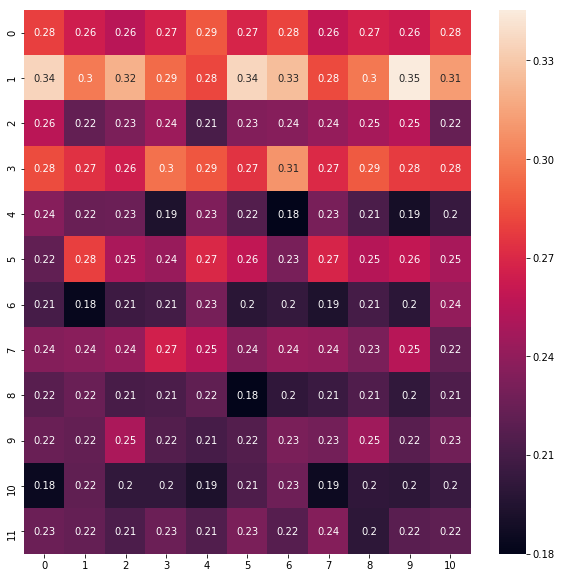

In [126]:
plt.figure(figsize=(10,10),)
sns.heatmap(np.array(f1_mat),annot=True)

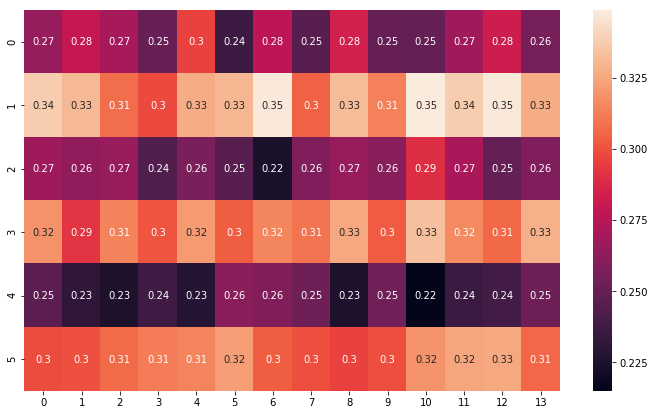

In [134]:
plt.figure(figsize=(12,7),)
sns.heatmap(np.array(f1_mat),annot=True)

<h3> xgboost 최적화

In [8]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
# from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [3]:
data_.loc[data_['DE1_dg']==8, ['DE1_dg']] =0.0
data_ = data_.loc[data_['DE1_dg']!=9.0, :]
data_['DE1_dg'].value_counts()

0.0    42802
1.0     3398
Name: DE1_dg, dtype: int64

In [4]:
# data_.loc[data_['DE1_dg']==8,['DE1_dg']]=0
X_train, X_test, y_train, y_test = train_test_split(data_, data_['DE1_dg'],test_size=0.2)
X_train = X_train.iloc[:, ~X_train.columns.isin(['DE1_dg'])]
X_test = X_test.iloc[:, ~X_test.columns.isin(['DE1_dg'])]

In [5]:
y_train.value_counts()

0.0    34225
1.0     2735
Name: DE1_dg, dtype: int64

In [47]:
# Specify sufficient boosting iterations to reach a minimum
num_round = 300

# Leave most parameters as default
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': 2, # Number of possible output classes
         'tree_method': 'gpu_hist' # Use GPU accelerated algorithm
         }

# Convert input data from numpy to XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

gpu_res = {} # Store accuracy result
# Train model
xgb_m = xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_res,verbose_eval=False)


In [104]:
xgb_m.save_model('xgb_softmax_3000.model')
xgb_m.dump_model('dump.raw.txt')
# xgb.dump_model('dump.raw.txt','featmap.txt')# dump model with feature map

In [48]:
res = xgb_m.predict(dtest)

In [49]:
f1_score(y_test, res)

0.49525616698292224

In [6]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate

In [6]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, )
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
#     print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    print('f1_score: {}'.format(f1_score(dtrain[target] , dtrain_predictions)))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    plt.figure(figsize=(20,10))
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [8]:
predictors = [x for x in data_.columns if x not in ['DE1_dg']]
target = 'DE1_dg'
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# modelfit(xgb1, data_, predictors, target)

In [9]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
         min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
         param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(data_[predictors],data_[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anac

({'mean_fit_time': array([ 57.23720293,  60.5986238 ,  59.15288749,  86.46647439,
          88.22218146,  82.78901405, 113.02638187, 110.83713117,
         108.22451534, 147.18158283, 137.05325599, 123.28605504]),
  'mean_score_time': array([0.2230041 , 0.24374733, 0.24953308, 0.30099692, 0.29481306,
         0.26509142, 0.31854839, 0.27646165, 0.28045006, 0.31555681,
         0.30717874, 0.25471926]),
  'mean_test_score': array([0.83611595, 0.85280144, 0.85733681, 0.83588861, 0.85401813,
         0.86455045, 0.83764953, 0.85556518, 0.86333216, 0.83944538,
         0.85965861, 0.87292681]),
  'mean_train_score': array([0.94762335, 0.94696533, 0.94697198, 0.97948388, 0.97704134,
         0.9747285 , 0.99833653, 0.99627121, 0.99368227, 0.99999766,
         0.99989865, 0.99935034]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
     

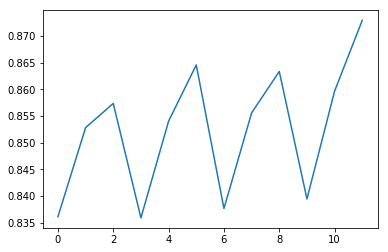

In [12]:
plt.plot(gsearch1.cv_results_['mean_test_score'])

In [67]:
gsearch1.cv_results_['params'][-4]

{'max_depth': 7, 'min_child_weight': 5}

In [20]:
param_test2 = {
 'max_depth':[9],
 'min_child_weight':[12,15,18] #커질수록 계속 정확도 높아짐?!!
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(data_[predictors],data_[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anac

({'mean_fit_time': array([133.93917317, 136.80272546, 116.21415806]),
  'mean_score_time': array([0.3133626 , 0.32433305, 0.25611553]),
  'mean_test_score': array([0.888704  , 0.89234715, 0.89328515]),
  'mean_train_score': array([0.99439422, 0.99154544, 0.98898227]),
  'param_max_depth': masked_array(data=[9, 9, 9],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[12, 15, 18],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 9, 'min_child_weight': 12},
   {'max_depth': 9, 'min_child_weight': 15},
   {'max_depth': 9, 'min_child_weight': 18}],
  'rank_test_score': array([3, 2, 1]),
  'split0_test_score': array([0.9169505 , 0.9180181 , 0.91630668]),
  'split0_train_score': array([0.993974  , 0.990389  , 0.98854611]),
  'split1_test_score': array([0.90202577, 0.90030645, 0.90302792]),
  'split1_train_score': array([0.9935

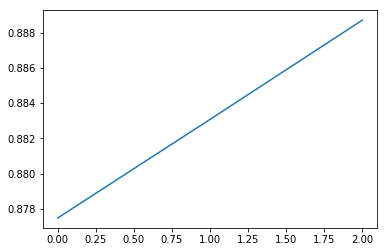

In [19]:
plt.plot(gsearch2.cv_results_['mean_test_score'])

In [17]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(data_[predictors],data_[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anac

({'mean_fit_time': array([128.59965153, 136.24022808, 134.70712657, 131.67403388,
         121.48507614]),
  'mean_score_time': array([0.27745857, 0.26668735, 0.29042425, 0.32054334, 0.26548433]),
  'mean_test_score': array([0.8774859 , 0.87988129, 0.87716051, 0.87879894, 0.88086955]),
  'mean_train_score': array([0.99774296, 0.99764085, 0.99753249, 0.99772222, 0.99764954]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([4, 2, 5, 3, 1]),
  'split0_test_score': array([0.9093277 , 0.90846417, 0.91081563, 0.91303792, 0.91302452]),
  'split0_train_score': array([0.99738105, 0.99709256, 0.99705985, 0.99750556, 0.99734785]),
  'split1_test_score': array([0.89847685, 0.89475082, 0.89362224, 0.89380278, 0.89718766]),
  'split1_train_score


Model Report
AUC Score (Train): 0.982517
f1_score: 0.7388167388167388


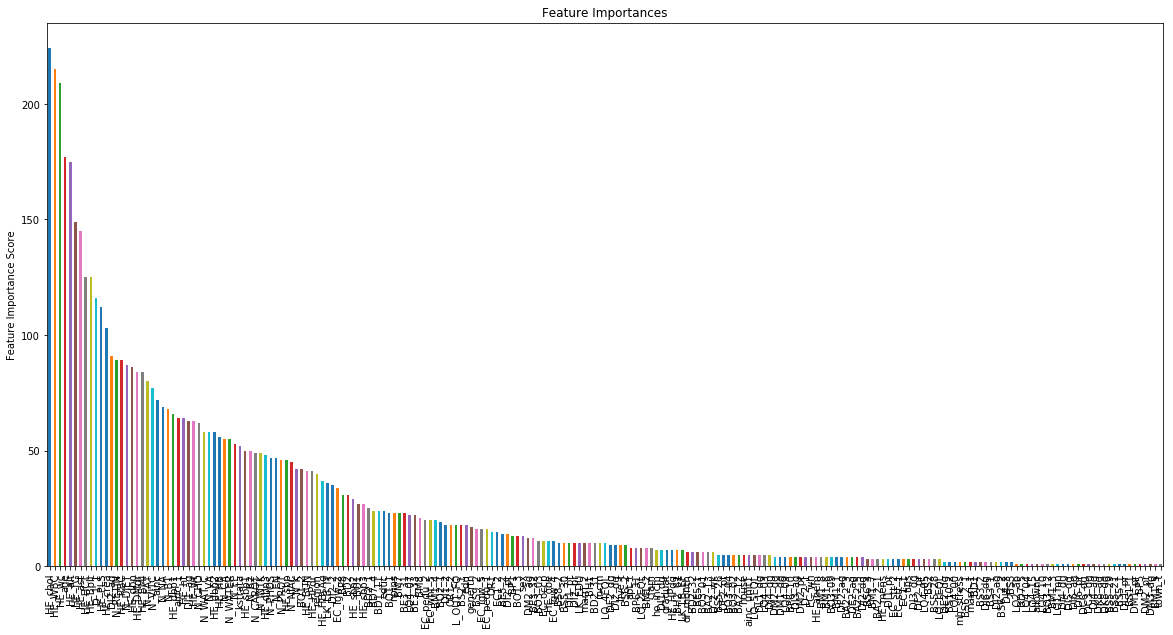

In [21]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=18,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, data_, predictors,target)

In [ ]:
param_test4 = {
 'subsample':[0.1,0.2, 0.3, 0.4]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=9,
 min_child_weight=18, gamma=0.4, subsample=0.8, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(data_[predictors],data_[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [84]:
param_test6 = {
 'reg_alpha':[0.03, 0.05, 0.1, 0.5]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.1, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(data_[predictors],data_[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anac

({'mean_fit_time': array([15.96749654, 15.49915013, 16.3466855 , 16.27727103]),
  'mean_score_time': array([0.090558  , 0.08178105, 0.10132937, 0.08457365]),
  'mean_test_score': array([0.88639549, 0.88654175, 0.88815458, 0.88754202]),
  'mean_train_score': array([0.93035392, 0.93019148, 0.9302181 , 0.93058644]),
  'param_reg_alpha': masked_array(data=[0.03, 0.05, 0.1, 0.5],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.03},
   {'reg_alpha': 0.05},
   {'reg_alpha': 0.1},
   {'reg_alpha': 0.5}],
  'rank_test_score': array([4, 3, 1, 2]),
  'split0_test_score': array([0.87016119, 0.87023701, 0.86899924, 0.86878467]),
  'split0_train_score': array([0.93449428, 0.93383294, 0.93464002, 0.935044  ]),
  'split1_test_score': array([0.89051058, 0.89141121, 0.89219938, 0.89462994]),
  'split1_train_score': array([0.92533418, 0.92617667, 0.92653436, 0.9263191 ]),
  'split2_test_score': array([0.86380674, 0.86546


Model Report
AUC Score (Train): 0.935648
f1_score: 0.4653397391901167


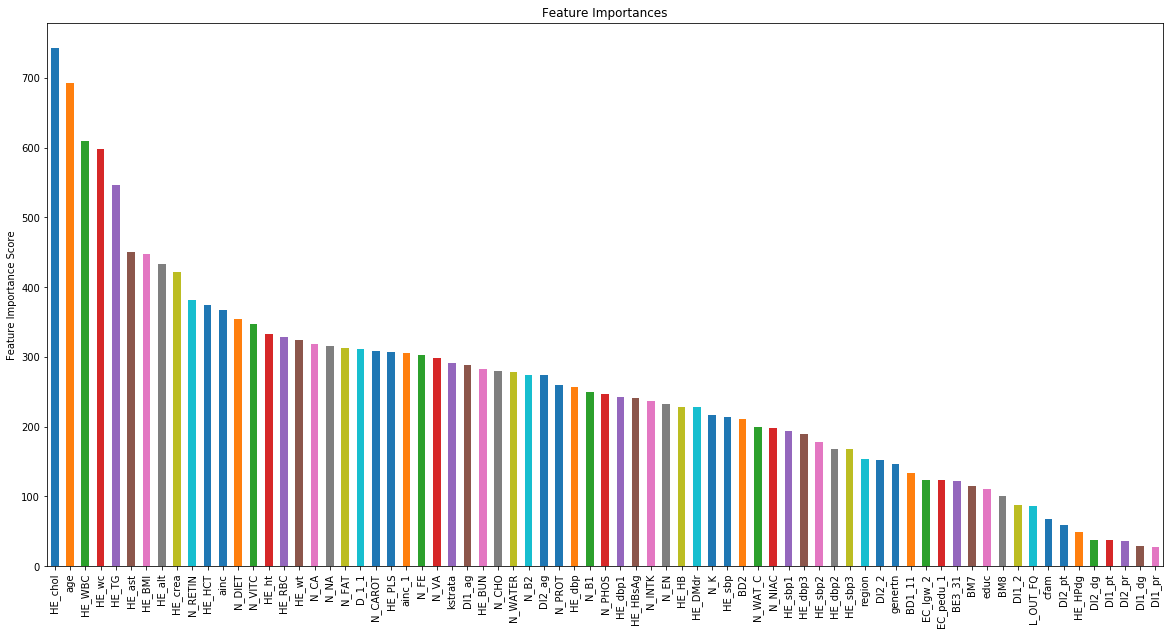

In [86]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.1,
 subsample=0.1,
 colsample_bytree=0.6,
 reg_alpha=0.1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, data_, predictors,target)

In [91]:
param_test7 = {
 'learning_rate':[1e-5, 1e-2, 0.1, 0.5, 1]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.1, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.1,), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(data_[predictors],data_[target])
gsearch7.cv_results_, gsearch6.best_params_, gsearch6.best_score_

c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anaconda3\envs\ximz\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nb-0242\anac

({'mean_fit_time': array([15.80313663, 15.60945697, 16.41031537, 15.87295156, 12.5707828 ]),
  'mean_score_time': array([0.09713993, 0.09155507, 0.09933448, 0.10272527, 0.07340393]),
  'mean_test_score': array([0.87061837, 0.88426633, 0.88815458, 0.80276911, 0.79226109]),
  'mean_train_score': array([0.87769391, 0.89434747, 0.9302181 , 0.88332391, 0.83812549]),
  'param_learning_rate': masked_array(data=[1e-05, 0.01, 0.1, 0.5, 1],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 1e-05},
   {'learning_rate': 0.01},
   {'learning_rate': 0.1},
   {'learning_rate': 0.5},
   {'learning_rate': 1}],
  'rank_test_score': array([3, 2, 1, 4, 5]),
  'split0_test_score': array([0.83963029, 0.85748463, 0.86899924, 0.78813455, 0.7750231 ]),
  'split0_train_score': array([0.881712  , 0.89810117, 0.93464002, 0.88970705, 0.84828426]),
  'split1_test_score': array([0.86494336, 0.87967549, 0.89219938, 0.79945998,

# 바뀐 하이퍼 파라미터로 다시 시도 

In [37]:
f_xgb = XGBClassifier( learning_rate =0.1, n_estimators=3000, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.1, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.1,)

In [38]:
f_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=6, missing=None,
       n_estimators=3000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.1)

In [39]:
xg_res = f_xgb.predict(X_test)

In [40]:
f1_score(y_test, xg_res)

0.4139737991266375

In [70]:
data_['DE1_dg'].shape

(56248,)

# 디폴트 파라미터

In [35]:
f_xgb = XGBClassifier()
f_xgb.fit(X_train, y_train)
xg_res = f_xgb.predict(X_test)
f1_score(y_test, xg_res)

0.41049030786773094

In [36]:
np.sum(np.equal(y_test, xg_res))/len(y_test)

0.944047619047619